In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

from utils.dataframe import get_final_dataframe

df = get_final_dataframe("random_forest")

2025-04-22 09:48:25,347 - data_processing.data_preprocessing - INFO - tourney_name column successfully dropped
2025-04-22 09:48:25,386 - data_processing.data_preprocessing - INFO - tourney_id column successfully dropped
2025-04-22 09:48:25,425 - data_processing.data_preprocessing - INFO - match_num column successfully dropped
2025-04-22 09:48:25,467 - data_processing.data_preprocessing - INFO - winner_name column successfully dropped
2025-04-22 09:48:25,507 - data_processing.data_preprocessing - INFO - loser_name column successfully dropped
2025-04-22 09:48:25,543 - data_processing.data_preprocessing - INFO - score column successfully dropped
2025-04-22 09:48:25,575 - data_processing.data_preprocessing - INFO - best_of column successfully dropped
2025-04-22 09:48:25,608 - data_processing.data_preprocessing - INFO - round column successfully dropped
2025-04-22 09:48:25,636 - data_processing.data_preprocessing - INFO - minutes column successfully dropped
2025-04-22 09:48:25,664 - data_pr

In [91]:
df.head()

,player_1_id,player_1_seed,player_1_ht,player_1_ioc,player_1_age,player_1_rank,player_1_rank_points,player_1_entry_ALT,player_1_entry_Alt,player_1_entry_ITF,...,tourney_level_G,tourney_level_M,tourney_level_O,player_1_won,rank_diff,rank_points_diff,height_diff,player_1_elo,player_2_elo,elo_diff
0,100201,0.001001,188.0,1,23.7,0.005025,0.0,False,False,False,...,False,False,False,False,-21.494975,0.0,187.998999,1500.0,1500.000000,0.000000
1,100030,0.001001,190.0,1,35.0,0.025000,0.0,False,False,False,...,False,False,False,True,0.013889,0.0,-3.000000,1500.0,1500.000000,0.000000
2,100049,0.001001,175.0,2,33.0,0.011111,0.0,False,False,False,...,False,False,False,False,-19.788889,0.0,174.998999,1500.0,1537.500000,-37.500000
3,100309,0.001001,183.0,3,20.3,0.031250,0.0,False,False,False,...,False,False,False,True,0.006250,0.0,-7.000000,1500.0,1537.500000,-37.500000
4,100321,0.001001,193.0,0,19.8,0.045455,0.0,False,False,False,...,False,False,False,True,0.014205,0.0,10.000000,1500.0,1541.531868,-41.531868


In [108]:
x = df.drop("player_1_won", axis=1)
y = df["player_1_won"]

In [109]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

array([[<Axes: title={'center': 'player_1_id'}>,
        <Axes: title={'center': 'player_1_seed'}>,
        <Axes: title={'center': 'player_1_ht'}>,
        <Axes: title={'center': 'player_1_ioc'}>,
        <Axes: title={'center': 'player_1_age'}>],
       [<Axes: title={'center': 'player_1_rank'}>,
        <Axes: title={'center': 'player_1_rank_points'}>,
        <Axes: title={'center': 'player_2_seed'}>,
        <Axes: title={'center': 'player_2_ht'}>,
        <Axes: title={'center': 'player_2_ioc'}>],
       [<Axes: title={'center': 'player_2_age'}>,
        <Axes: title={'center': 'player_2_rank'}>,
        <Axes: title={'center': 'player_2_rank_points'}>,
        <Axes: title={'center': 'draw_size'}>,
        <Axes: title={'center': 'tourney_year'}>],
       [<Axes: title={'center': 'tourney_month'}>,
        <Axes: title={'center': 'tourney_day'}>,
        <Axes: title={'center': 'rank_diff'}>,
        <Axes: title={'center': 'rank_points_diff'}>,
        <Axes: title={'center': 

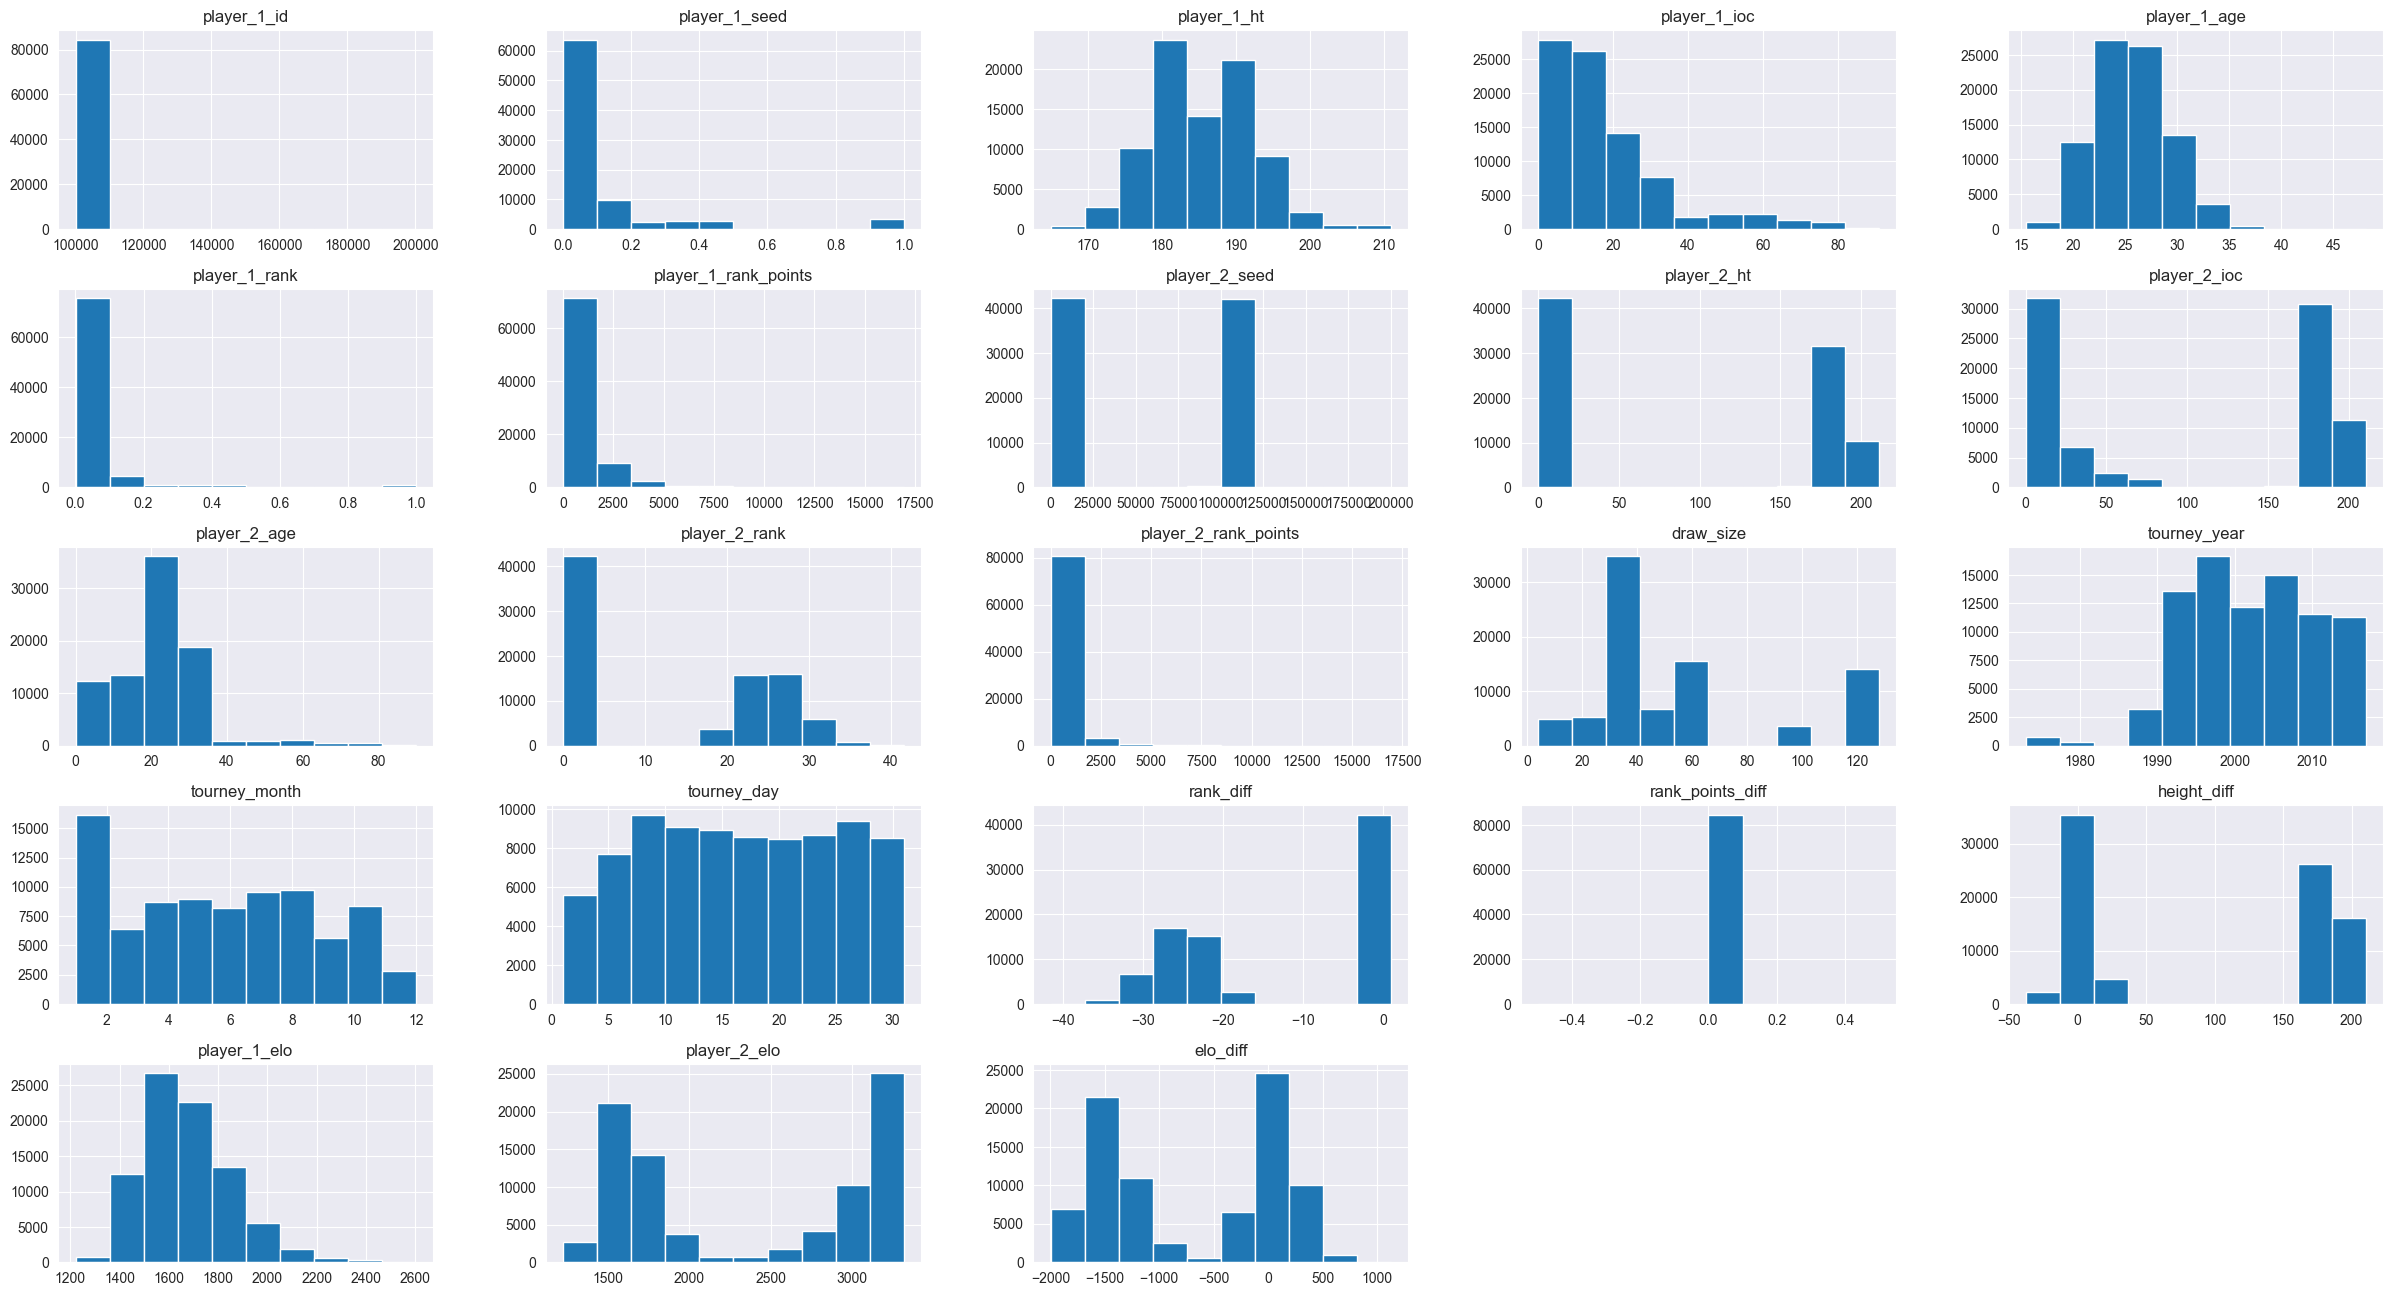

In [110]:
train_data = x_train.join(y_train)
train_data.hist(figsize = (30, 16))

<Axes: >

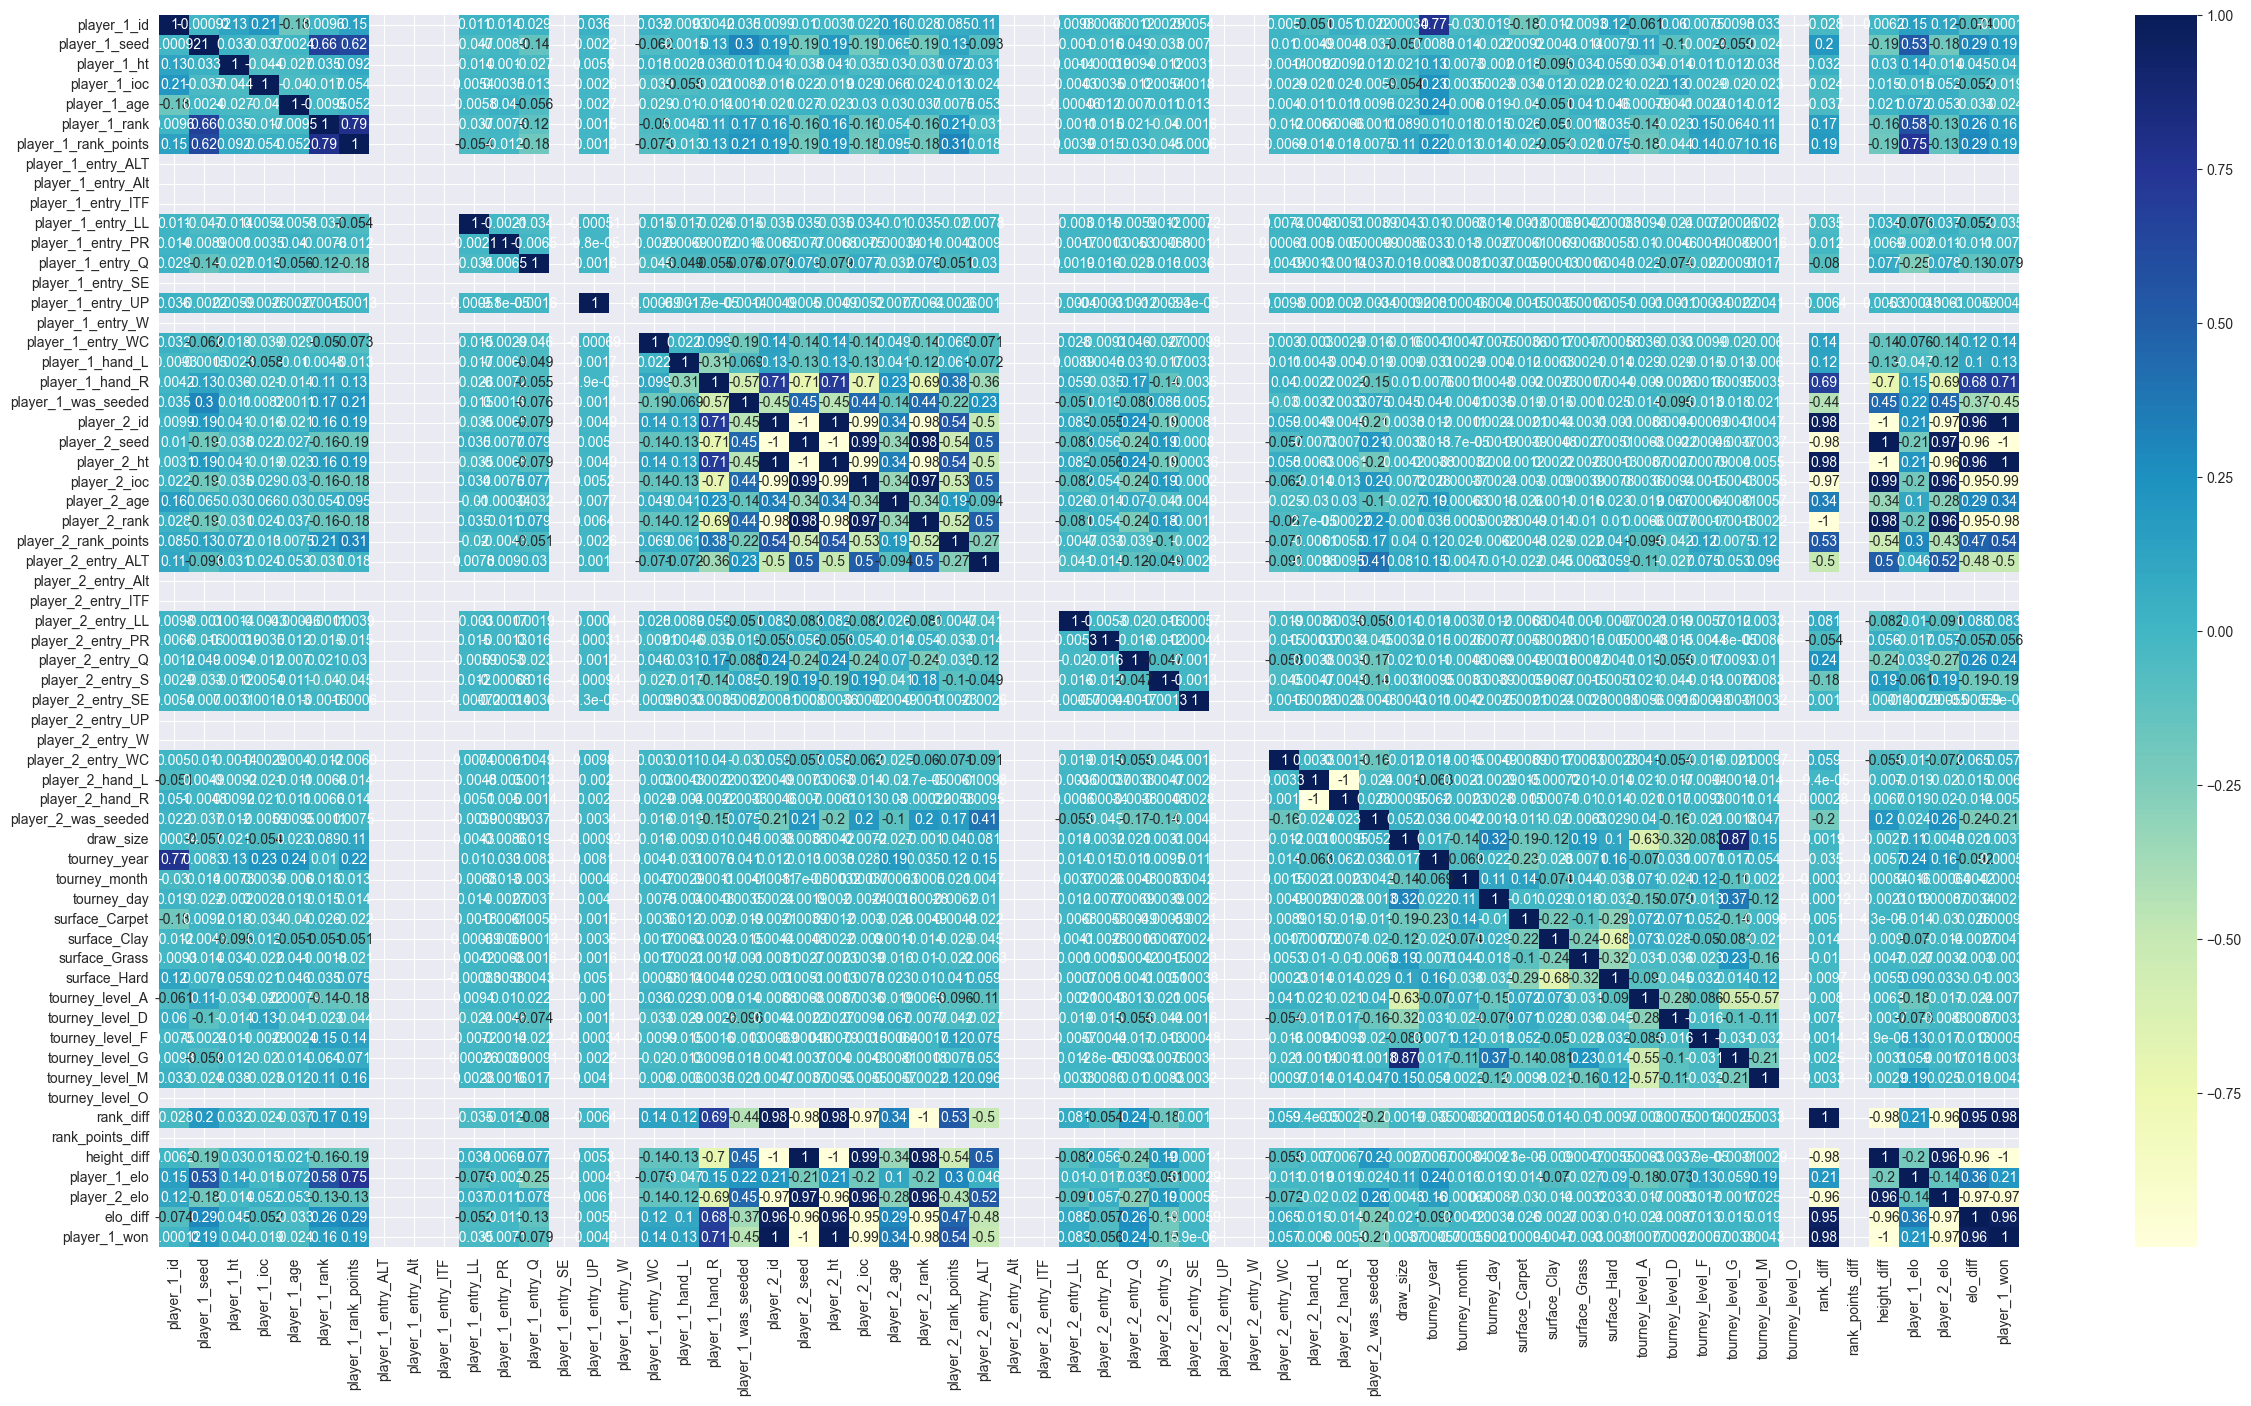

In [121]:
plt.figure(figsize = (30, 16))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

In [122]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

forest.fit(x_train, y_train)

RandomForestClassifier()

In [123]:
accuracy = forest.score(x_test, y_test)
print(f"Accuracy -> {accuracy * 100}%")

Accuracy -> 100.0%


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105733 entries, 0 to 105732
Data columns (total 62 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   player_1_id           105733 non-null  int64  
 1   player_1_seed         105733 non-null  float64
 2   player_1_ht           105733 non-null  float64
 3   player_1_ioc          105733 non-null  int64  
 4   player_1_age          105733 non-null  float64
 5   player_1_rank         105733 non-null  float64
 6   player_1_rank_points  105733 non-null  float64
 7   player_1_entry_ALT    105733 non-null  bool   
 8   player_1_entry_Alt    105733 non-null  bool   
 9   player_1_entry_ITF    105733 non-null  bool   
 10  player_1_entry_LL     105733 non-null  bool   
 11  player_1_entry_PR     105733 non-null  bool   
 12  player_1_entry_Q      105733 non-null  bool   
 13  player_1_entry_SE     105733 non-null  bool   
 14  player_1_entry_UP     105733 non-null  bool   
 15  

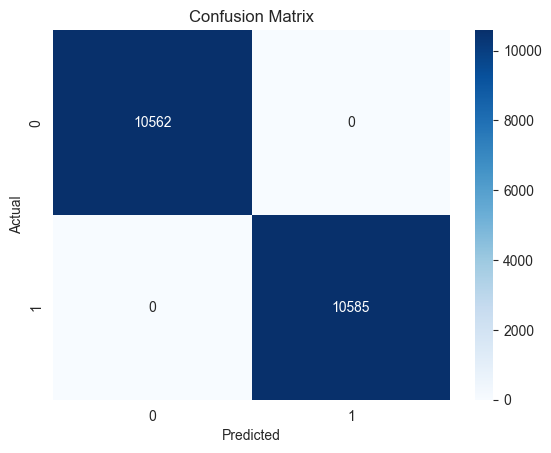

In [107]:
len(x_train)